<a href="https://colab.research.google.com/github/qusaysellat/Python-Machine-Lerning-Tutorial/blob/master/Denoising_Auto_Encoder_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**THIS IS A SIMPLE DENOISING AUTO-ENCODER BULIT WITH KERAS FOR** *MNIST DATASET*

>NAME : [QUSAY SELLAT](https://github.com/qusaysellat)

>FOR MORE INFORMATION ABOUT 'MNIST' VISIT
[THIS SITE](http://yann.lecun.com/exdb/mnist/)

In [1]:
# lets import the libraries we are going to use
from keras.models import Model
from keras.layers import Dense, Input
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [0]:
# it's time to define used parameters

# hyperparameters
epoches = 100
batch_size = 128
hidden = 512
corruption_level = 0.3

# input structure
rows = 28
cols = 28
pixels = 784

In [0]:
# lets load and pre-process MNIST dataset

# load data
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# normalize input so that our algorithm converges faster
X_train = X_train.astype('float32')/255.
X_test = X_test.astype('float32')/255.

# reshape to fit the auto-encoder structure
X_train = X_train.reshape((-1, pixels))
X_test = X_test.reshape((-1, pixels))

In [0]:
# lets build the input of the denoising autoencoder by adding noise
noised_X_train = X_train + corruption_level * np.random.normal(size=X_train.shape)
noised_X_test = X_test + corruption_level * np.random.normal(size=X_test.shape)

In [0]:
# then we clip the values in input so that they are between 0 and 1
noised_X_train = noised_X_train.clip(min=0., max=1.)
noised_X_test = noised_X_test.clip(min=0., max=1.)

In [6]:
# lets write our model

# first we define the input
model_input = Input(shape=(pixels,))

# then we add the encoding and decoding layers
encoded = Dense(hidden, activation='relu')(model_input)
decoded = Dense(pixels, activation='sigmoid')(encoded)

# finally we define our model
DAE = Model(input = model_input, output = decoded)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  


In [7]:
# lets run our model

# compile
DAE.compile(optimizer='adadelta', loss='binary_crossentropy')



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [8]:
# summarize
DAE.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 784)               402192    
Total params: 804,112
Trainable params: 804,112
Non-trainable params: 0
_________________________________________________________________


In [9]:
# train
DAE.fit(x=noised_X_train, y=X_train, batch_size=batch_size, epochs=epoches, verbose=1, shuffle=True, validation_data=(noised_X_test, X_test))


Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 15s 242us/step - loss: 0.2725 - val_loss: 0.2245
Epoch 2/100
60000/60000 [==============================] - 14s 235us/step - loss: 0.2029 - val_loss: 0.1837
Epoch 3/100
60000/60000 [==============================] - 14s 231us/step - loss: 0.1736 - val_loss: 0.1625
Epoch 4/100
60000/60000 [==============================] - 14s 233us/step - loss: 0.1565 - val_loss: 0.1485
Epoch 5/100
60000/60000 [==============================] - 14s 232us/step - loss: 0.1444 - val_loss: 0.1381
Epoch 6/100
60000/60000 [==============================] - 14s 232us/step - loss: 0.1354 - val_loss: 0.1303
Epoch 7/100
60000/60000 [==============================] - 14s 235us/step - loss: 0.1286 - val_loss: 0.1243
Epoch 8/100
60000/60000 [==============================] - 14s 230us/step - loss: 0.1233 - val_loss: 0.1196
Epoch 9/100
60000/60000 [==============================] - 14s 232us/step - loss: 0.1

In [10]:
# evaluate
evaluation = DAE.evaluate(noised_X_test, X_test, batch_size=batch_size, verbose=1)
print(evaluation)

10000/10000 [==============================] - 1s 74us/step
0.08401299591064453


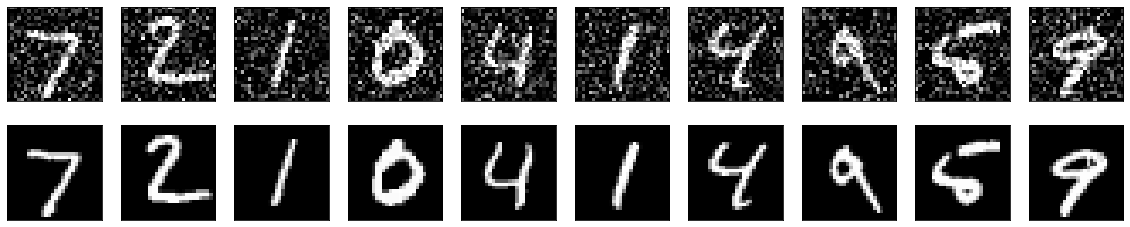

In [11]:
# lets see how our model correct the images

# get decoded images
decoded_images = DAE.predict(noised_X_test)

# set number of images I want to show
n = 10

# lets plot and compare !
plt.figure(figsize=(2*n, 4))

for i in range(n) :
  _ = plt.subplot(2, n, i+1)
  plt.imshow(noised_X_test[i].reshape((rows, cols)), cmap='gray')
  _.get_xaxis().set_visible(False)
  _.get_yaxis().set_visible(False)

  _ = plt.subplot(2, n, n+i+1)
  plt.imshow(X_test[i].reshape((rows, cols)), cmap='gray')
  _.get_xaxis().set_visible(False)
  _.get_yaxis().set_visible(False)